# Introduction

We will be using a function to visualize boxplots when only the percentiles and outliers data are given.

The function has been downloaded from stackoverflow.com. Later, we will notice that some extra functionalities needed to be added to prevent some crashes and make the function more flexible.

http://stackoverflow.com/questions/27214537/is-it-possible-to-draw-a-matplotlib-boxplot-given-the-percentile-values-instead



## Why we want to do this?
We want to understand first out the mechanism of plotting outliers work in Python and the plotting library `matplotlib`. How is it that define what is an outlier? How does that compare to other methods?

Later, in subsequent notebooks, we will generate five of the most common distributions and extract the percentiles and outliers to later compare against the boxplot generated data.

## Steps

* Use a matplotlib example for boxplot


* Analyze how boxplot handles the data to generate the graphic


* Use the boxplot data to extract the percentiles and outliers


* Use the percentiles with the customized boxplot function


* Use the outliers with the customized boxplot function


* Modify the function to make it flexible


# Matplotlib example using boxplot
We will use the percentile to test the new function above

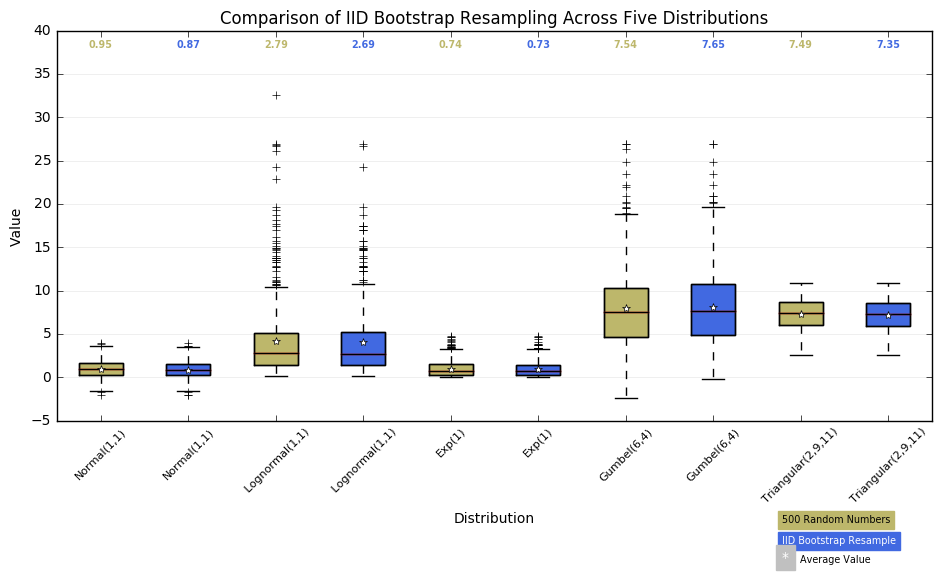

In [34]:
"""
Thanks Josh Hemann for the example
"""
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


# Generate some data from five different probability distributions,
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional
# properties of the original sample, and a boxplot is one visual tool
# to make this assessment
numDists = 5
randomDists = ['Normal(1,1)', ' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
               'Triangular(2,9,11)']
N = 500
np.random.seed(250)
norm = np.random.normal(1, 1, N)
logn = np.random.lognormal(1, 1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
# bootstrapIndices = np.random.random_integers(0, N - 1, N)
bootstrapIndices = np.random.randint(0, N-1, N)

normBoot = norm[bootstrapIndices]
expoBoot = expo[bootstrapIndices]
gumbBoot = gumb[bootstrapIndices]
lognBoot = logn[bootstrapIndices]
triaBoot = tria[bootstrapIndices]

data = [norm, normBoot, logn, lognBoot, expo, expoBoot, gumb, gumbBoot,
        tria, triaBoot]

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k],
             color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
            backgroundcolor=boxColors[0], color='black', weight='roman',
            size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
            backgroundcolor=boxColors[1],
            color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='x-small')

plt.show()

## Observations

> Each of the variables of the x-axis represent a distributions and its corresponding bootstrap. There are a total of 10 distributions. We will notice that some generate more outliers than others.

> The number of samples for each variable is 500.

> We are setting a seed value of 250 to make the random numbers reproducible so we can compare later in other notebooks.

## Data to be used
We will pay attention to these variables:

     data
     
     bp
     
`data` corresponds to the random data generated for the distributions and their bootstraps.

`bp` is the data that boxplot generates to produce the graphic.


In [31]:
data[0]

array([ -4.50948249e-01,   2.91095313e+00,   1.71187915e+00,
         7.52261713e-01,   1.36146623e+00,   9.67050329e-01,
         7.78653282e-01,   1.47725678e+00,   3.08060626e-01,
         1.79200593e+00,   1.07324913e+00,   2.30328603e+00,
         1.21348149e+00,   2.01734895e+00,   2.91171178e+00,
         4.70328369e-01,   2.84213516e+00,  -5.72350817e-02,
         1.37083714e-01,   1.23763150e+00,  -1.54181771e-01,
         2.21498404e+00,  -2.93759083e-01,   1.82272281e+00,
         6.67848874e-01,  -2.81429009e-01,   1.21853781e+00,
         3.08347422e+00,   7.51781937e-01,   1.26746040e+00,
         1.71251350e+00,   3.46392316e-01,   1.16227964e+00,
         3.21338050e+00,   3.34465766e-01,  -9.00321653e-03,
         3.34805122e+00,   1.60437586e+00,   1.64382910e+00,
         6.68247737e-01,   1.06986397e+00,   9.85288974e-01,
         2.71106875e+00,   6.43554932e-01,   1.64311606e+00,
         7.59117219e-01,  -1.55798096e+00,  -9.55662953e-01,
         1.02570574e+00,

## get percentiles from example

In [14]:
def get_percentiles_from_box_plots(bp):
    percentiles = []
    for i in range(len(bp['boxes'])):
        percentiles.append((bp['caps'][2*i].get_ydata()[0],
                           bp['boxes'][i].get_ydata()[0],
                           bp['medians'][i].get_ydata()[0],
                           bp['boxes'][i].get_ydata()[2],
                           bp['caps'][2*i + 1].get_ydata()[0],
                           (bp['fliers'][i].get_xdata(),
                            bp['fliers'][i].get_ydata())))
    return percentiles

In [15]:
percentiles = get_percentiles_from_box_plots(bp)
len(percentiles)

for i, member in enumerate(percentiles):
    print(i)
    print(member)
    

0
(-1.6192907740901807, 0.35174095209408052, 1.0260067613011099, 1.6721023250331477, 3.4705318633599527, (array([ 1.,  1.]), array([-1.79982364,  4.07076344])))
1
(-1.5301117253899967, 0.33446576626856084, 1.0152628749616897, 1.600678573599208, 3.4705318633599527, (array([ 2.]), array([-1.61929077])))
2
(0.10166466983733546, 1.3766863478766307, 2.6229332395870397, 4.832733938727503, 9.7097074363027662, (array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]), array([ 12.4693623 ,  18.29509913,  13.27748208,  17.03087604,
        12.4684671 ,  12.12314072,  14.16694607,  10.90641397,
        10.22947534,  18.74799991,  10.63507501,  12.53201362,
        10.53094144,  11.58117831,  20.25536322,  10.59869092,
        10.16674195,  31.57715351,  13.18001712,  10.39392371,
        22.04888464,  12.00707821,  12.26359609,  10.09020059,
        17.19549512,  

There are 10 variables in `percentiles`:

In [16]:
percentiles = get_percentiles_from_box_plots(bp)
len(percentiles)

for i, member in enumerate(percentiles):
    print(i)
    print(member)
    

0
(-1.6192907740901807, 0.35174095209408052, 1.0260067613011099, 1.6721023250331477, 3.4705318633599527, (array([ 1.,  1.]), array([-1.79982364,  4.07076344])))
1
(-1.5301117253899967, 0.33446576626856084, 1.0152628749616897, 1.600678573599208, 3.4705318633599527, (array([ 2.]), array([-1.61929077])))
2
(0.10166466983733546, 1.3766863478766307, 2.6229332395870397, 4.832733938727503, 9.7097074363027662, (array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]), array([ 12.4693623 ,  18.29509913,  13.27748208,  17.03087604,
        12.4684671 ,  12.12314072,  14.16694607,  10.90641397,
        10.22947534,  18.74799991,  10.63507501,  12.53201362,
        10.53094144,  11.58117831,  20.25536322,  10.59869092,
        10.16674195,  31.57715351,  13.18001712,  10.39392371,
        22.04888464,  12.00707821,  12.26359609,  10.09020059,
        17.19549512,  

## find the members of the last variable

In [17]:
data10 = percentiles[9]
data10 = list([data10])
data10

[(2.3968251090686419,
  5.9073526123455178,
  7.6454787582627777,
  8.7725900101517471,
  10.77326413646135,
  (array([], dtype=float64), array([], dtype=float64)))]

show each member of the variable. Note that the last member contains two arrays: the `x` and the `y`.
`x` is the position on the x-axis, `y` is the position on the boxplot.

In [18]:
for m in range(0, len(data10[0])):
    print(m, data10[0][m])

0 2.39682510907
1 5.90735261235
2 7.64547875826
3 8.77259001015
4 10.7732641365
5 (array([], dtype=float64), array([], dtype=float64))


the last member will contain the outliers as an array.

## analyze a variable with outliers

In [19]:
data7 = percentiles[6]
data7 = list([data7])
data7

[(-0.58981570009841633,
  4.7547977981667193,
  7.6977061676167411,
  10.672323657143846,
  19.493666637532581,
  (array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.]),
   array([ 19.65933753,  20.0260936 ,  36.03197223,  20.42375224,
           20.20840431,  35.94379213,  20.23985393,  19.93053796,
           21.88864504,  24.64179985,  19.674149  ,  20.34126258])))]

In [20]:
for m in range(0, len(data7[0])):
    print(m, data7[0][m])

0 -0.589815700098
1 4.75479779817
2 7.69770616762
3 10.6723236571
4 19.4936666375
5 (array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.]), array([ 19.65933753,  20.0260936 ,  36.03197223,  20.42375224,
        20.20840431,  35.94379213,  20.23985393,  19.93053796,
        21.88864504,  24.64179985,  19.674149  ,  20.34126258]))


the sixth member (index=5) is formed by two arrays.

Let's find the size of each array:


In [21]:
arr = data7[0][5]
print(len(arr[0]))
print(len(arr[1]))

12
12


The two arrays have the same size. Most likely coordinates for the outliers.

Let's do the analysis for another variable., let's say index order = 4.

In [22]:
data = percentiles[4]
data = list([data])

for m in range(0, len(data[0])):
    print(m, data[0][m])

0 0.00091725354177
1 0.303239317392
2 0.77242487517
3 1.44883639586
4 3.15088240758
5 (array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.]), array([ 3.17236593,  3.2889463 ,  3.50172035,  3.53514588,  4.42826136,
        3.22250579,  4.01904722,  3.77605473,  7.25033373,  4.65254458,
        3.49924832,  3.24560123,  3.24026776,  3.2543675 ,  4.58955512,
        3.86724071,  4.21149062,  5.57634322,  4.7997969 ,  5.77719271,
        3.18080354,  3.45233877,  3.21318794]))


For variable, #6 or index order = 5.

In [23]:
data6 = percentiles[5]
data6 = list([data6])

for m in range(0, len(data6[0])):
    print(m, data6[0][m])

0 0.00091725354177
1 0.30160012953
2 0.732440749125
3 1.41940892985
4 2.8818139414
5 (array([ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.]), array([ 3.22250579,  3.24560123,  3.15088241,  3.77605473,  3.53514588,
        3.50172035,  3.2543675 ,  3.2543675 ,  3.2889463 ,  4.01904722,
        3.77605473,  3.22250579,  3.17236593,  4.7997969 ,  3.17236593,
        3.24560123,  4.21149062,  3.86724071,  3.13123797,  3.18080354,
        3.77605473,  3.15088241,  3.21318794,  3.77605473,  4.58955512,
        4.65254458]))


If we want to plot this variable alone, then, we will need to change the position #6 to #0.

In [24]:
arr = data6[0][5]
print(len(arr[0]))
print(len(arr[1]))

26
26


Changing the __x__ coordinates of the array:

In [25]:
for k in range(0, len(arr[0])):
    arr[0][k] = 1
    print(k, arr[0][k])

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0


In [26]:
data6

[(0.00091725354177027451,
  0.30160012952994097,
  0.73244074912539969,
  1.4194089298460149,
  2.8818139413982014,
  (array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
   array([ 3.22250579,  3.24560123,  3.15088241,  3.77605473,  3.53514588,
           3.50172035,  3.2543675 ,  3.2543675 ,  3.2889463 ,  4.01904722,
           3.77605473,  3.22250579,  3.17236593,  4.7997969 ,  3.17236593,
           3.24560123,  4.21149062,  3.86724071,  3.13123797,  3.18080354,
           3.77605473,  3.15088241,  3.21318794,  3.77605473,  4.58955512,
           4.65254458])))]

We will notice that the outliers are plotted now because the `x-axis` is "1", which corresponds to the number of variable drawn.

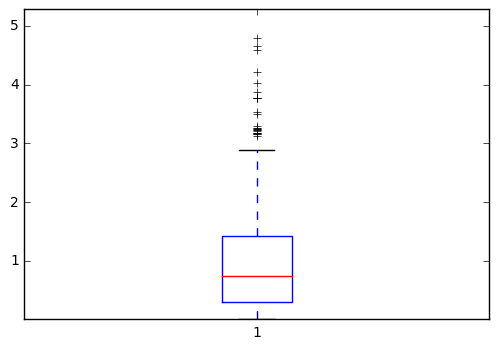

In [29]:
fig, ax = plt.subplots()
b = customized_box_plot(data6, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

In [30]:
print(np.min(data[5]))
print(np.percentile(data[5], 25))    # q1
print(np.percentile(data[5], 50))    # median!
print(np.percentile(data[5], 75))    # q3
print(np.percentile(data[5], 94.7888))    # 
print(np.max(data[5]))

IndexError: list index out of range

In [31]:
pctl = np.percentile(data[5], [0, 25, 50, 75, 100])
pctl

IndexError: list index out of range

the first numpy array belongs to the number of the variable.

In [32]:
data[0][0]

0.00091725354177027451

# Working and plotting data

## A customized boxplot function
This is a function that will plot a boxplot given a list of percentiles.
Additionally, it can be provided the outliers

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

def customized_box_plot(percentiles, axes, redraw = True, *args, **kwargs):
    """
    Generates a customized boxplot based on the given percentile values
    """
    n_box = len(percentiles)
    # print(n_box)
    box_plot = axes.boxplot([[-9, -4, 2, 4, 9],]*n_box, *args, **kwargs) 
    # Creates len(percentiles) no of box plots

    min_y, max_y = float('inf'), -float('inf')

    # print(len(percentiles))
    for box_no, pdata in enumerate(percentiles):
        # print(len(pdata))
        if len(pdata) == 6:
            (q1_start, q2_start, q3_start, q4_start, q4_end, fliers_xy) = pdata
        elif len(pdata) == 5:
            (q1_start, q2_start, q3_start, q4_start, q4_end) = pdata
            fliers_xy = None
        else:
            raise ValueError("Percentile arrays for customized_box_plot must have either 5 or 6 values")

        # Lower cap
        box_plot['caps'][2*box_no].set_ydata([q1_start, q1_start])
        # xdata is determined by the width of the box plot

        # Lower whiskers
        box_plot['whiskers'][2*box_no].set_ydata([q1_start, q2_start])

        # Higher cap
        box_plot['caps'][2*box_no + 1].set_ydata([q4_end, q4_end])

        # Higher whiskers
        box_plot['whiskers'][2*box_no + 1].set_ydata([q4_start, q4_end])

        # Box
        path = box_plot['boxes'][box_no].get_path()
        path.vertices[0][1] = q2_start
        path.vertices[1][1] = q2_start
        path.vertices[2][1] = q4_start
        path.vertices[3][1] = q4_start
        path.vertices[4][1] = q2_start

        # Median
        box_plot['medians'][box_no].set_ydata([q3_start, q3_start])

        # Outliers
        if fliers_xy is not None and len(fliers_xy[0]) != 0:
            # If outliers exist
            box_plot['fliers'][box_no].set(xdata = fliers_xy[0],
                                           ydata = fliers_xy[1])

            min_y = min(q1_start, min_y, fliers_xy[1].min())
            max_y = max(q4_end, max_y, fliers_xy[1].max())

        else:
            min_y = min(q1_start, min_y)
            max_y = max(q4_end, max_y)

        # The y axis is rescaled to fit the new box plot completely with 10% 
        # of the maximum value at both ends
        # print(min_y, max_y)
        axes.set_ylim([min_y*1.1, max_y*1.1])
        #ax.set_xlabel("abc")
        
    # If redraw is set to true, the canvas is updated.
    if redraw:
        ax.figure.canvas.draw()

    return box_plot

## A tiny sample

This will show boxplot of a variable with minimum data, the percentiles:

In [2]:
#:           min, 1qt, med, 3qt, max 
tiny = [-9, -4, 2, 7, 9]
tiny_data = [tiny]

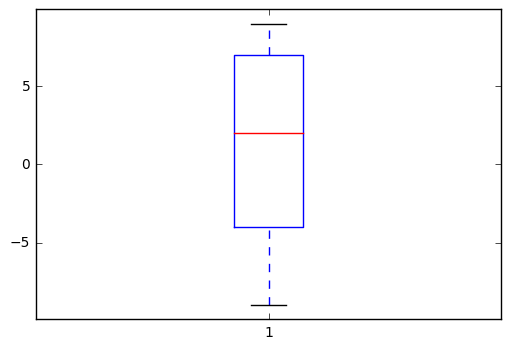

In [3]:
fig, ax = plt.subplots()
b = customized_box_plot(tiny_data, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

> Observe that there are not any outliers and the whiskers show the minimum and maximum points.

## Add outliers to tiny_data

In [4]:
import numpy as np

# with outliers
outliers = np.array([10, 11, 12])

In [5]:
tiny_data

[[-9, -4, 2, 7, 9]]

In [6]:
import itertools

tiny_data_out = tiny_data
tiny_data_out = itertools.chain(*tiny_data)
print(tiny_data_out)
tiny_data_out = list(tiny_data_out)
tiny_data_out.append(outliers)
tiny_data_out = [tiny_data_out]
print(tiny_data_out)

[[-9, -4, 2, 7, 9, array([10, 11, 12])]]


TypeError: object of type 'numpy.int32' has no len()

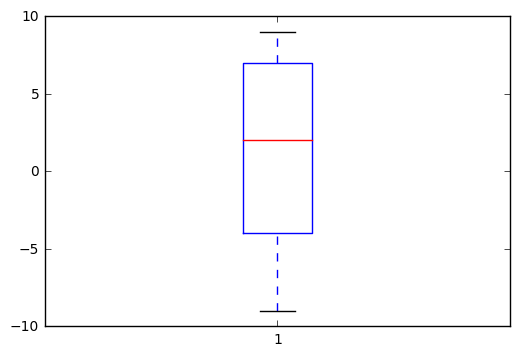

In [8]:
fig, ax = plt.subplots()
b = customized_box_plot(tiny_data_out, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

## plotting two variables

These are two variables:

In [9]:
small_data = [[-9, -4, 2, 7, 9], [11,12,13,14,15]]

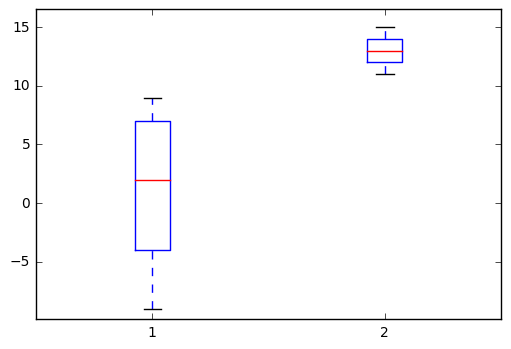

In [10]:
fig, ax = plt.subplots()
b = customized_box_plot(small_data, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

## plotting three variables

In [11]:
more_data = [[-9, -4, 2, 7, 9], [11,12,13,14,15], [-15, -5, 0, 5, 15]]

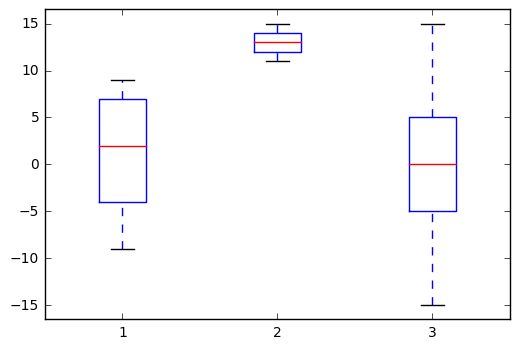

In [12]:
fig, ax = plt.subplots()
b = customized_box_plot(more_data, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

# Selecting and plotting one variable

In [82]:
def one_var(n):
    ndata = percentiles[n]
    ndata = list([ndata])
    print(ndata)
    return ndata

def boxplot_data(dat):
    fig, ax = plt.subplots()
    b = customized_box_plot(dat, ax, redraw=True)
    plt.show()
    
def get_raw_data(n):
    return data[n]

In [93]:
np.percentile(get_raw_data(5), 50)

0.73244074912539969

[(0.00091725354177027451, 0.30160012952994097, 0.73244074912539969, 1.4194089298460149, 2.8818139413982014, (array([ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.]), array([ 3.22250579,  3.24560123,  3.15088241,  3.77605473,  3.53514588,
        3.50172035,  3.2543675 ,  3.2543675 ,  3.2889463 ,  4.01904722,
        3.77605473,  3.22250579,  3.17236593,  4.7997969 ,  3.17236593,
        3.24560123,  4.21149062,  3.86724071,  3.13123797,  3.18080354,
        3.77605473,  3.15088241,  3.21318794,  3.77605473,  4.58955512,
        4.65254458])))]


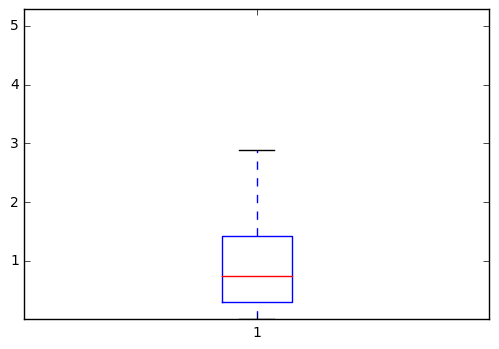

In [94]:
boxplot_data(one_var(5))

We modify the function to replace the plot number. This is only applicable to the `percentiles` array produced by th example above.

In [295]:
def set_plot_number(var):
    print("outliers")
    arr = var[0][5]

    for k in range(0, len(arr[0])):
        arr[0][k] = 1
        print(k, arr[0][k], arr[1][k])

def one_var(n):
    data = percentiles[n]
    data = list([data])
    set_plot_number(data)
    print("\nvariable percentiles")
    print(data)
    return data

def boxplot_data(dat):
    fig, ax = plt.subplots()
    b = customized_box_plot(dat, ax, redraw=True)
    plt.show()

outliers
0 1.0 20.4562117706
1 1.0 24.2622384061
2 1.0 22.3320930258
3 1.0 20.6159014635
4 1.0 19.8618209175
5 1.0 20.8647609272
6 1.0 27.4147715918
7 1.0 20.8647609272
8 1.0 19.8264374664
9 1.0 20.5044580922
10 1.0 20.5044580922
11 1.0 20.6159014635
12 1.0 29.0979962323
13 1.0 29.0048223937

variable percentiles
[(-1.4813301944276471, 4.752126999739156, 7.4419187466122052, 10.719840132828264, 19.452595579195481, (array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]), array([ 20.45621177,  24.26223841,  22.33209303,  20.61590146,
        19.86182092,  20.86476093,  27.41477159,  20.86476093,
        19.82643747,  20.50445809,  20.50445809,  20.61590146,
        29.09799623,  29.00482239])))]


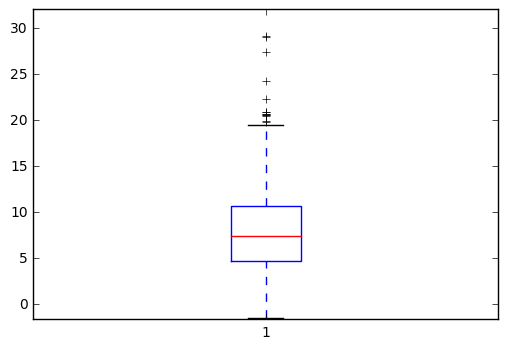

In [296]:
boxplot_data(one_var(7))

Now, the outliers and percentiles are plotted.

# What is the right way of sending variable to the function?

## Cases:
* the variable only contains the percentiles: `[[0, 100, 250, 250, 1000]]`
    
* the variable contains the percentiles and outliers: `[[0, 100, 250, 250, 1000, array([1100, 1200, 1300])]`

* the variable contains the percentiles and outliers with order: 
`[[0, 100, 250, 250, 1000, (array([5, 5, 5]), array([1100, 1200, 1300]))]`

* 


> Note that the outliers are not shown in the plot. That is because __plot number__ is __8__ when it should be __1__.

outliers
0 1.0 4.75573570903
1 1.0 4.25161039141
2 1.0 5.11141072448
3 1.0 3.5833189633
4 1.0 3.88979908829
5 1.0 5.05778455174
6 1.0 3.36532576509
7 1.0 4.70412166102
8 1.0 3.26401023466
9 1.0 6.10545763818
10 1.0 3.8168602338
11 1.0 3.46028917605
12 1.0 4.84305595271
13 1.0 3.83944201013
14 1.0 3.40817362936
15 1.0 3.89252678893
16 1.0 4.39406842337
17 1.0 3.78216702428
18 1.0 3.61665310326
19 1.0 3.30256207476
20 1.0 4.79885266751
21 1.0 7.38540031739

variable percentiles
[(3.4476217707530214e-06, 0.29828320472770531, 0.73358342934397358, 1.4830849588559039, 3.1857403275630243, (array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]), array([ 4.75573571,  4.25161039,  5.11141072,  3.58331896,  3.88979909,
        5.05778455,  3.36532577,  4.70412166,  3.26401023,  6.10545764,
        3.81686023,  3.46028918,  4.84305595,  3.83944201,  3.40817363,
        3.89252679,  4.39406842,  3.78216702,  3.6166531 ,  3.302562

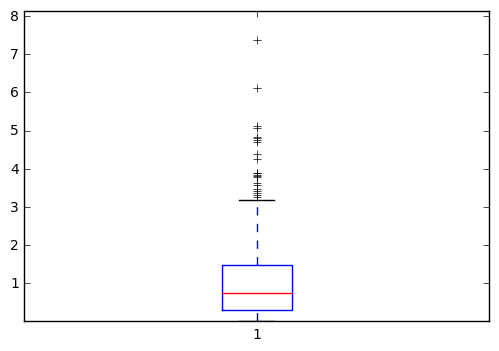

In [297]:
i = 4
print(one_var(i))
boxplot_data(one_var(i))

# Reconstructing a percentiles variable

 (array([ 1.,  1.,  1.]), array([-1.98329217, -1.91932292,(-1.5101813369410104, 0.20051552516175283, 0.88397138569718048, 1.5759700055799479, 3.4881552580734554,  4.16112339])))

This is how the function understands the variable:

`[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, array([-1.98329217, -1.91932292,  4.16112339])]]`

We want this part first:

`array([-1.98329217, -1.91932292,  4.16112339])`

In [298]:
from __future__ import print_function
import numpy as np
import copy

#: this is the outliers part
arr = np.array([-1.98329217, -1.91932292,  4.16112339, 4.5, 4.6, 4.7, 5.1, 5.25])
print("outliers:", arr)

var = [[-1.5101813369410104, 0.20051552516175283, 0.88397138569718048, 1.5759700055799479, 3.4881552580734554]]
print("\nvar with percentiles only:")
print(var)

var_liers = copy.deepcopy(var)

var_liers = [[-1.5101813369410104, 0.20051552516175283, 0.88397138569718048, 1.5759700055799479, 3.4881552580734554, arr]]
print("\nvar with percentiles and outliers:")
print(var_liers)


outliers: [-1.98329217 -1.91932292  4.16112339  4.5         4.6         4.7         5.1
  5.25      ]

var with percentiles only:
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554]]

var with percentiles and outliers:
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]]


In [299]:
# assign the variable
(q1_start, q2_start, q3_start, q4_start, q4_end, fliers_xy) = var_liers[0]
fliers_xy

try:
    if len(fliers_xy[0]) != 0:
        print("variable has outliers with order array")
except TypeError:
    arr_len = len(fliers_xy)
    arr = np.full((1, arr_len), 1, dtype=np.int)
    fliers_xy = [arr, fliers_xy]

print("outliers with complete array")
print(fliers_xy)

outliers with complete array
[array([[1, 1, 1, 1, 1, 1, 1, 1]]), array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]


In [300]:
import copy
print("\nOriginal variable")
print(var_liers)
new_var = copy.deepcopy(var_liers)        #: use this to copy the original variable
print("\nCopy of the variable")
print(new_var)
new_var[0][5] = fliers_xy
print("\nVariable with complete outlier arrays")
print(new_var)


Original variable
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]]

Copy of the variable
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]]

Variable with complete outlier arrays
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, [array([[1, 1, 1, 1, 1, 1, 1, 1]]), array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]]]


# Modifying the function

In [128]:
#: new version of the function
#: we will check if the variable provided has outliers with order

%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

def customized_box_plot_2(percentiles, axes, redraw = True, *args, **kwargs):
    """
    Generates a customized boxplot based on the given percentile values
    """
    #print(percentiles)
    n_box = len(percentiles)      
    
    # print(n_box)
    box_plot = axes.boxplot([[-9, -4, 2, 4, 9],]*n_box, *args, **kwargs) 
    # Creates len(percentiles) no of box plots

    min_y, max_y = float('inf'), -float('inf')

    # print(len(percentiles))
    for box_no, pdata in enumerate(percentiles):
        # print(len(pdata))
        if len(pdata) == 6:
            #: outlier provided too
            (q1_start, q2_start, q3_start, q4_start, q4_end, fliers_xy) = pdata
            try:
                if len(fliers_xy[0]) != 0:
                    print("variable already with complete outliers arrays")
            except TypeError:
                arr_len = len(fliers_xy) 
                arr = np.full((1, arr_len), box_no+1, dtype=np.int)
                fliers_xy = [arr, fliers_xy]
                print("outliers arrays being fixed")
            
        elif len(pdata) == 5:
            #: only percentiles and no outliers provided
            (q1_start, q2_start, q3_start, q4_start, q4_end) = pdata
            fliers_xy = None
        else:
            raise ValueError("Percentile arrays for customized_box_plot must have either 5 or 6 values")
        print(percentiles)
        # Lower cap
        box_plot['caps'][2*box_no].set_ydata([q1_start, q1_start])
        # xdata is determined by the width of the box plot

        # Lower whiskers
        box_plot['whiskers'][2*box_no].set_ydata([q1_start, q2_start])

        # Higher cap
        box_plot['caps'][2*box_no + 1].set_ydata([q4_end, q4_end])

        # Higher whiskers
        box_plot['whiskers'][2*box_no + 1].set_ydata([q4_start, q4_end])

        # Box
        path = box_plot['boxes'][box_no].get_path()
        path.vertices[0][1] = q2_start
        path.vertices[1][1] = q2_start
        path.vertices[2][1] = q4_start
        path.vertices[3][1] = q4_start
        path.vertices[4][1] = q2_start

        # Median
        box_plot['medians'][box_no].set_ydata([q3_start, q3_start])

        # Outliers
        if fliers_xy is not None and len(fliers_xy[0]) != 0:
            # If outliers exist
            box_plot['fliers'][box_no].set(xdata = fliers_xy[0],
                                           ydata = fliers_xy[1])

            min_y = min(q1_start, min_y, fliers_xy[1].min())
            max_y = max(q4_end, max_y, fliers_xy[1].max())

        else:
            min_y = min(q1_start, min_y)
            max_y = max(q4_end, max_y)

        # The y axis is rescaled to fit the new box plot completely with 10% 
        # of the maximum value at both ends
        # print(min_y, max_y)
        axes.set_ylim([min_y*1.1, max_y*1.1])

    # If redraw is set to true, the canvas is updated.
    if redraw:
        ax.figure.canvas.draw()

    return box_plot

## plotting variable with percentiles only

[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554]]


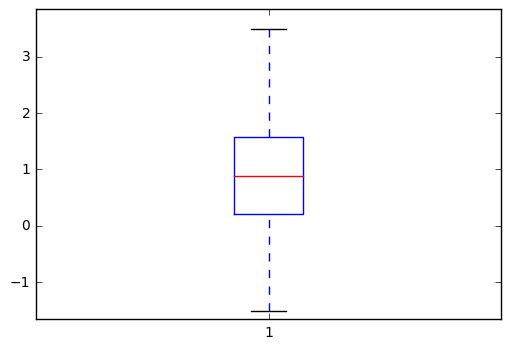

In [302]:
fig, ax = plt.subplots()
b = customized_box_plot_2(var, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

## plotting variable with percentiles and outliers

outliers arrays being fixed
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]]


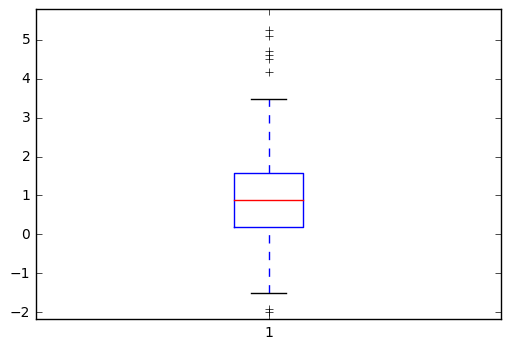

In [303]:
fig, ax = plt.subplots()
b = customized_box_plot_2(var_liers, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

## plotting variable with percentiles and full outliers array

variable already with complete outliers arrays
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, [array([[1, 1, 1, 1, 1, 1, 1, 1]]), array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]]]


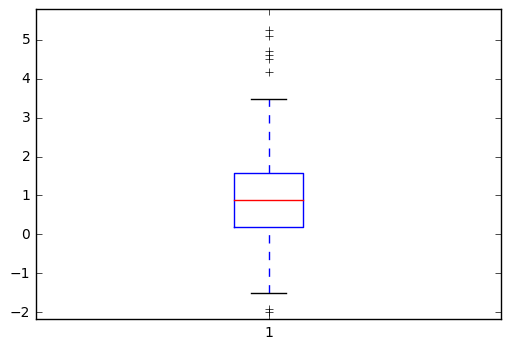

In [304]:
fig, ax = plt.subplots()
b = customized_box_plot_2(new_var, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

## Plotting two variables

In [305]:
var2 = [
    [0.046074393272752909, 1.3760634609664242, 2.6665020489404672, 5.1285508380255065, 10.666501091274366,  
     np.array([ 58.02866486,  11.45321818,  22.07822949,  22.45961125,
        16.87011061,  20.3233718 ,  15.85607562,  15.41986669,
        38.28052858,  12.98513382,  14.98140378,  11.07628   ,
        27.91280291,  24.56596929,  19.40586646,  17.63709413,
        11.78366448,  15.99032273,  16.39685225,  15.1011541 ,
        20.7520012 ,  28.02038221,  15.18711787,  11.77347242,
        18.80012143,  18.71984609,  25.33987546,  10.90768046,
        22.08223004,  13.47145357,  17.40222801,  11.85771055,
        19.25615699,  15.60277387,  13.98971756,  17.78220994,  14.43462277])], 
    [0.046074393272752909, 1.5246110253179361, 2.7479316437592698, 5.4891446185065549, 11.076279997386985,
        np.array([ 11.85771055,  20.7520012 ,  25.33987546,  20.7520012 ,
        15.1011541 ,  25.33987546,  22.07822949,  13.47145357,
        20.3233718 ,  17.40222801,  22.07822949,  15.41986669,
        15.85607562,  22.08223004,  15.85607562,  24.56596929,
        22.07822949,  18.80012143,  22.08223004,  13.47145357,
        24.56596929,  16.87011061,  13.98971756,  15.1011541 ,
        17.63709413,  25.33987546,  12.98513382,  11.85771055,
        18.80012143,  19.25615699,  19.25615699,  15.60277387,
        22.08223004,  16.39685225,  20.7520012 ,  20.7520012 ,
        19.40586646,  28.02038221,  20.3233718 ,  17.78220994,
        15.41986669,  11.77347242,  18.71984609,  17.78220994,
        22.08223004,  17.63709413,  11.78366448])]]
len(var2)

2

outliers arrays being fixed
[[0.04607439327275291, 1.3760634609664242, 2.666502048940467, 5.1285508380255065, 10.666501091274366, array([ 58.02866486,  11.45321818,  22.07822949,  22.45961125,
        16.87011061,  20.3233718 ,  15.85607562,  15.41986669,
        38.28052858,  12.98513382,  14.98140378,  11.07628   ,
        27.91280291,  24.56596929,  19.40586646,  17.63709413,
        11.78366448,  15.99032273,  16.39685225,  15.1011541 ,
        20.7520012 ,  28.02038221,  15.18711787,  11.77347242,
        18.80012143,  18.71984609,  25.33987546,  10.90768046,
        22.08223004,  13.47145357,  17.40222801,  11.85771055,
        19.25615699,  15.60277387,  13.98971756,  17.78220994,  14.43462277])], [0.04607439327275291, 1.5246110253179361, 2.74793164375927, 5.489144618506555, 11.076279997386985, array([ 11.85771055,  20.7520012 ,  25.33987546,  20.7520012 ,
        15.1011541 ,  25.33987546,  22.07822949,  13.47145357,
        20.3233718 ,  17.40222801,  22.07822949,  15.41986669

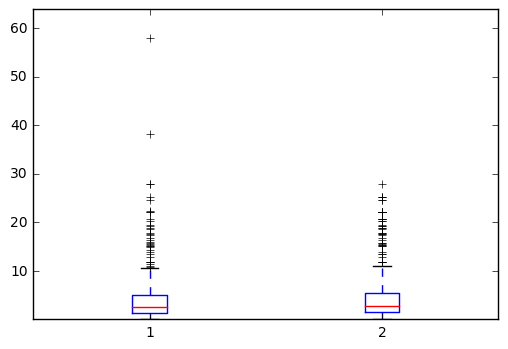

In [306]:
fig, ax = plt.subplots()
b = customized_box_plot_2(var2, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

# Plotting 3 variables

In [307]:
var3 = [
    [0.0010843233045542845, 0.25565718336819021, 0.65655818225384854, 1.4097895748558775, 3.1381483731475055,
     np.array([ 3.85936004,  3.64947577,  3.58858888,  3.92276005,  3.77442565,
        3.95079551,  3.85634407,  5.16496041,  3.85936004,  4.76743735,
        3.64813252,  3.15551507,  5.12903467,  3.38026   ,  3.60470992,
        3.95079551,  3.38026   ,  3.38026   ,  4.76743735,  3.64947577,
        4.71882111,  3.64947577,  5.12903467,  3.38026   ,  3.58858888,
        3.60470992,  3.30765364,  5.7030546, 7, 8, 9.0 ])], 

    [-2.2249477265050892, 4.5702758656293687, 7.2478994483455628, 11.263281071715951, 21.053087871065749, 
      np.array([ 22.02031101,  26.11582744,  21.35240282,  25.03574698, 22.36123611,  
                22.08104521,  28.11464668,  22.66492001, 23.33994018,  23.58629287,
                24.1, 24.2, 24.3, 24.4, 24.5
               ])],

    [-0.58468752435062044, 4.8192011234992709, 7.5908768584897182, 11.638280693192987, 21.352402819727644, 
     np.array([ 22.36123611,  22.08104521,  22.08104521,  22.66492001, 25.03574698,  
               23.33994018,  22.08104521,  23.58629287,  26.11582744])]
    ]
len(var3)

3

outliers arrays being fixed
[[0.0010843233045542845, 0.2556571833681902, 0.6565581822538485, 1.4097895748558775, 3.1381483731475055, array([ 3.85936004,  3.64947577,  3.58858888,  3.92276005,  3.77442565,
        3.95079551,  3.85634407,  5.16496041,  3.85936004,  4.76743735,
        3.64813252,  3.15551507,  5.12903467,  3.38026   ,  3.60470992,
        3.95079551,  3.38026   ,  3.38026   ,  4.76743735,  3.64947577,
        4.71882111,  3.64947577,  5.12903467,  3.38026   ,  3.58858888,
        3.60470992,  3.30765364,  5.7030546 ,  7.        ,  8.        ,  9.        ])], [-2.224947726505089, 4.570275865629369, 7.247899448345563, 11.263281071715951, 21.05308787106575, array([ 22.02031101,  26.11582744,  21.35240282,  25.03574698,
        22.36123611,  22.08104521,  28.11464668,  22.66492001,
        23.33994018,  23.58629287,  24.1       ,  24.2       ,
        24.3       ,  24.4       ,  24.5       ])], [-0.5846875243506204, 4.819201123499271, 7.590876858489718, 11.638280693192987, 

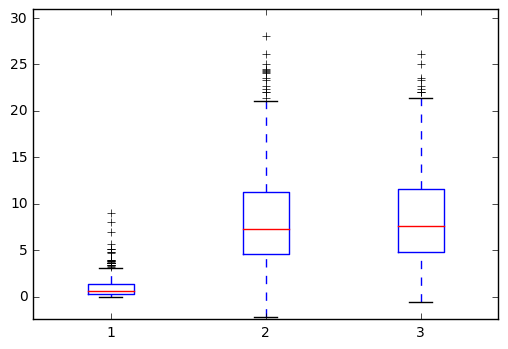

In [308]:
fig, ax = plt.subplots()
b = customized_box_plot_2(var3, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

## plotting one variable

In [309]:
var1= [[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, 
        np. array([-1.98329217, -1.91932292,  4.16112339,  4.5,  4.6, 4.7,  5.1,  5.25])]]

len(var1)

1

outliers arrays being fixed
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]]


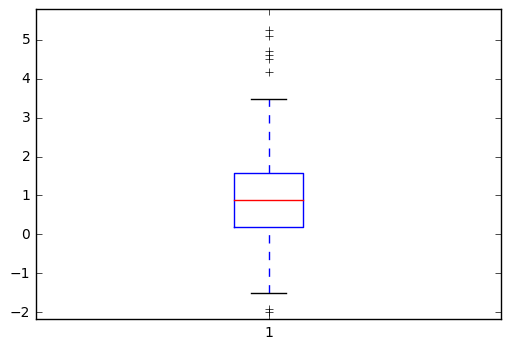

In [310]:
fig, ax = plt.subplots()
b = customized_box_plot_2(var1, ax, redraw=True, notch=0, sym='+', vert=1, whis=1.5)
plt.show()

# Fill an array wtih a given value

In [311]:
arr = np.full((1, 3), 1, dtype=np.int)
arr

array([[1, 1, 1]])

# Detecting outliers

http://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data

In [321]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [353]:
mask = is_outlier(data[2], 3.65)    #: boolean array with outliers

In [361]:
data[2][mask]

array([ 19.4816154 ,  17.7197534 ,  24.21645026,  16.31742435,
        10.1848823 ,  21.97692816,  15.0967663 ,  13.72055384,
        24.38212717,  21.0524112 ,  15.17149547,  21.3877546 ,
        25.12988966,  12.96084902,  23.29446521,  17.33851977,
        15.83410668,  17.61323445,  15.29418214,  22.1087928 ,
        10.1593045 ,  11.07912624,  20.1676824 ,  13.98339728,
        10.38547715,  10.21222151,  30.28459697,  21.78901242,
        10.93794542,  19.89847484,  23.65646077,  16.44377819,
        14.48816665,  15.07056186,  14.22190308,  11.35971705,
        10.0448614 ,  23.62643254,  45.24460726,  19.41745861,  11.82238295])

In [355]:
len(data[2][mask])

41

In [356]:
len(np.array([ 19.4816154 ,  17.7197534 ,  24.21645026,  16.31742435,
        10.1848823 ,  21.97692816,  15.0967663 ,  13.72055384,
        24.38212717,  21.0524112 ,  15.17149547,  21.3877546 ,
        25.12988966,  12.96084902,  23.29446521,  17.33851977,
        15.83410668,  17.61323445,  15.29418214,  22.1087928 ,
        10.1593045 ,  11.07912624,  20.1676824 ,  13.98339728,
        10.38547715,  10.21222151,  30.28459697,  21.78901242,
        10.93794542,  19.89847484,  23.65646077,  16.44377819,
        14.48816665,  15.07056186,  14.22190308,  11.35971705,
        10.0448614 ,  23.62643254,  45.24460726,  19.41745861,  11.82238295]))

41

# Writing the custom boxplot to data_science folder

In [6]:
%%writefile stats_funcs.py

#: new version of the function
#: we will check if the variable provided has outliers with order


from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

def customized_box_plot(percentiles, xtlabels=None, redraw = True, printdata=False, *args, **kwargs):
    """
    Generates a customized boxplot based on the given percentile values
    """
    xtlabel = list()
    fig, ax = plt.subplots()
    axes = ax
    n_box = len(percentiles)      
    
    box_plot = axes.boxplot([[-9, -4, 2, 4, 9],]*n_box, *args, **kwargs) 
    # Creates len(percentiles) no of box plots

    min_y, max_y = float('inf'), -float('inf')

    for box_no, pdata in enumerate(percentiles):
        if xtlabels is None:
            xtlabel.append(str(box_no+1))
        else:
            xtlabel = xtlabels
        
        if len(pdata) == 6:
            #: outlier provided too
            (q1_start, q2_start, q3_start, q4_start, q4_end, fliers_xy) = pdata
            try:
                if len(fliers_xy[0]) != 0:
                    print("variable already with complete outliers arrays")
            except TypeError:
                arr_len = len(fliers_xy) 
                arr = np.full((1, arr_len), box_no+1, dtype=np.int)
                fliers_xy = [arr, fliers_xy]
                print("outliers arrays being fixed for variable %d" % box_no)
            
        elif len(pdata) == 5:
            #: only percentiles and no outliers provided
            (q1_start, q2_start, q3_start, q4_start, q4_end) = pdata
            fliers_xy = None
        else:
            raise ValueError("Percentile arrays for customized_box_plot must have either 5 or 6 values")
        if printdata:
            print(percentiles)
        # Lower cap
        box_plot['caps'][2*box_no].set_ydata([q1_start, q1_start])
        # xdata is determined by the width of the box plot

        # Lower whiskers
        box_plot['whiskers'][2*box_no].set_ydata([q1_start, q2_start])

        # Higher cap
        box_plot['caps'][2*box_no + 1].set_ydata([q4_end, q4_end])

        # Higher whiskers
        box_plot['whiskers'][2*box_no + 1].set_ydata([q4_start, q4_end])

        # Box
        path = box_plot['boxes'][box_no].get_path()
        path.vertices[0][1] = q2_start
        path.vertices[1][1] = q2_start
        path.vertices[2][1] = q4_start
        path.vertices[3][1] = q4_start
        path.vertices[4][1] = q2_start

        # Median
        box_plot['medians'][box_no].set_ydata([q3_start, q3_start])

        # Outliers
        if fliers_xy is not None and len(fliers_xy[0]) != 0:
            # If outliers exist
            box_plot['fliers'][box_no].set(xdata = fliers_xy[0],
                                           ydata = fliers_xy[1])

            min_y = min(q1_start, min_y, fliers_xy[1].min())
            max_y = max(q4_end, max_y, fliers_xy[1].max())

        else:
            min_y = min(q1_start, min_y)
            max_y = max(q4_end, max_y)

        # The y axis is rescaled to fit the new box plot completely with 10% 
        # of the maximum value at both ends
        # print(min_y, max_y)
        axes.set_ylim([min_y*1.1, max_y*1.1])
    ax.set_xticklabels(xtlabel)

    # If redraw is set to true, the canvas is updated.
    if redraw:
        axes.figure.canvas.draw()
    plt.show()
    return box_plot

Overwriting stats_funcs.py


### Testing

In [239]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import stats_funcs

var1= [[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, 
        np. array([-1.98329217, -1.91932292,  4.16112339,  4.5,  4.6, 4.7,  5.1,  5.25])]]

outliers arrays being fixed for variable 0
[[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, array([-1.98329217, -1.91932292,  4.16112339,  4.5       ,  4.6       ,
        4.7       ,  5.1       ,  5.25      ])]]


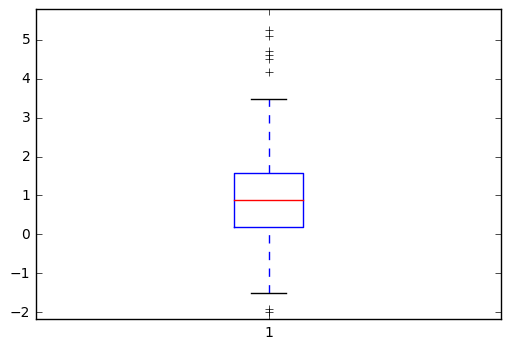

In [240]:
b = stats_funcs.customized_box_plot(var1, redraw=True, notch=0, sym='+', vert=1, whis=1.5, printdata=True)

outliers arrays being fixed for variable 0


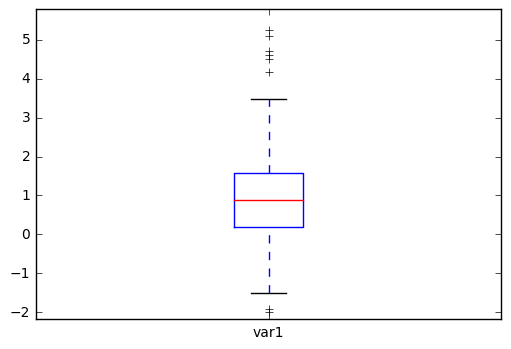

In [241]:
b = stats_funcs.customized_box_plot(var1, xtlabels=["var1"], redraw=True, notch=0, sym='+', vert=1, whis=1.5)

outliers arrays being fixed for variable 0
outliers arrays being fixed for variable 1
outliers arrays being fixed for variable 2


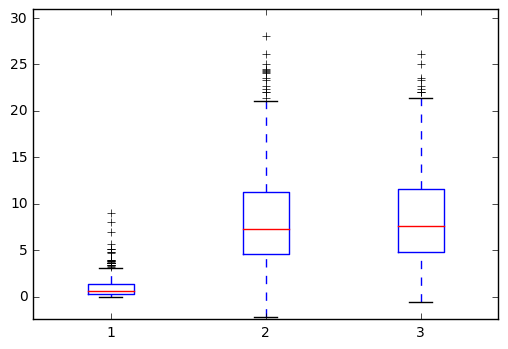

In [242]:
var3 = [
    [0.0010843233045542845, 0.25565718336819021, 0.65655818225384854, 1.4097895748558775, 3.1381483731475055,
     np.array([ 3.85936004,  3.64947577,  3.58858888,  3.92276005,  3.77442565,
        3.95079551,  3.85634407,  5.16496041,  3.85936004,  4.76743735,
        3.64813252,  3.15551507,  5.12903467,  3.38026   ,  3.60470992,
        3.95079551,  3.38026   ,  3.38026   ,  4.76743735,  3.64947577,
        4.71882111,  3.64947577,  5.12903467,  3.38026   ,  3.58858888,
        3.60470992,  3.30765364,  5.7030546, 7, 8, 9.0 ])], 

    [-2.2249477265050892, 4.5702758656293687, 7.2478994483455628, 11.263281071715951, 21.053087871065749, 
      np.array([ 22.02031101,  26.11582744,  21.35240282,  25.03574698, 22.36123611,  
                22.08104521,  28.11464668,  22.66492001, 23.33994018,  23.58629287,
                24.1, 24.2, 24.3, 24.4, 24.5
               ])],

    [-0.58468752435062044, 4.8192011234992709, 7.5908768584897182, 11.638280693192987, 21.352402819727644, 
     np.array([ 22.36123611,  22.08104521,  22.08104521,  22.66492001, 25.03574698,  
               23.33994018,  22.08104521,  23.58629287,  26.11582744])]
    ]

b = stats_funcs.customized_box_plot(var3, redraw=True, notch=0, sym='+', vert=1, whis=1.5)

outliers arrays being fixed for variable 0
outliers arrays being fixed for variable 1
outliers arrays being fixed for variable 2


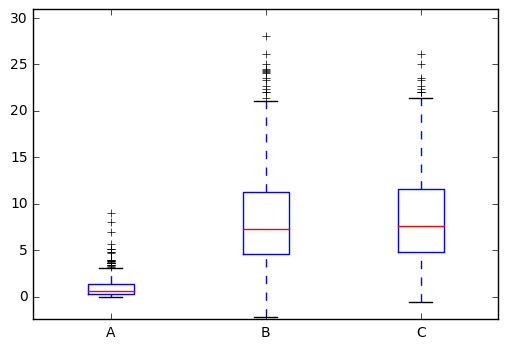

In [243]:
b = stats_funcs.customized_box_plot(var3, xtlabels=["A", "B", "C"], redraw=True, notch=0, sym='+', vert=1, whis=1.5)